In [1]:
import numpy as np
import os
import mdtraj as md
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt

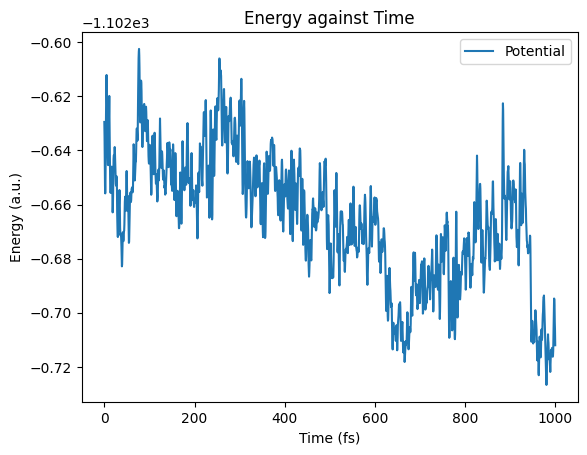

In [2]:
# plot ener against time water

water_files = "./Runs/Water/water_aimd_1ns_0.5fs"
water_ener_path = water_files + "-1.ener"

data = np.loadtxt(water_ener_path, comments='#') 

# plt.plot(data[:,1], data[:,2], label="Kinetic")
plt.plot(data[:,1], data[:,4], label="Potential")
# plt.plot(data[:,1], data[:,2] + data[:,4], label="Sum")
plt.xlabel("Time (fs)")
plt.ylabel("Energy (a.u.)")
plt.title("Energy against Time")
plt.savefig("./Figures/ener_time_water.png")
plt.legend()

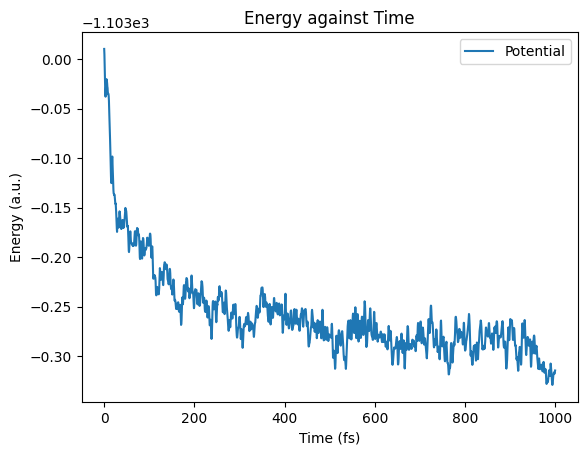

In [3]:
# plot ener against time proton

proton_files = "./Runs/Proton/proton_aimd_1ns_0.5fs"
proton_ener_path = proton_files + "-1.ener"

data = np.loadtxt(proton_ener_path, comments='#') 

# plt.plot(data[:,1], data[:,2], label="Kinetic")
plt.plot(data[:,1], data[:,4], label="Potential")
# plt.plot(data[:,1], data[:,2] + data[:,4], label="Sum")
plt.xlabel("Time (fs)")
plt.ylabel("Energy (a.u.)")
plt.title("Energy against Time")
plt.savefig("./Figures/ener_time_proton.png")
plt.legend()

In [4]:
import MDAnalysis.transformations as trans

BOX = 12.42
DIM = [BOX, BOX, BOX, 90, 90, 90]
transform = trans.boxdimensions.set_dimensions(DIM)


def load_traj(sys):
    if sys == "proton":
        file_sys = proton_files + "-pos-1.xyz"
    else:
        file_sys = water_files + "-pos-1.xyz"
    u = mda.Universe(file_sys)
    u.trajectory.add_transformations(transform)
    return u

def compute_rdf(sys, a, b):
    u = load_traj(sys)
    print("Num atoms a:", len(u.select_atoms("name {}".format(a))))
    print("Num atoms b:", len(u.select_atoms("name {}".format(b))))
    print(u.select_atoms("name {}".format(b))[0])
    rdf_calc = InterRDF(u.select_atoms("name {}".format(a)), 
                        u.select_atoms("name {}".format(b)), 
                        nbins=25,
                        range=(0.0001, BOX))
    rdf_calc.run()
    return rdf_calc.results.bins, rdf_calc.results.rdf

u = load_traj("proton")
print(u.dimensions)

[12.42 12.42 12.42 90.   90.   90.  ]


In [5]:
def plot_rdfs(sys, a = "O", b = "O"):
    bins, rdf = compute_rdf(sys, a, b)
    plt.plot(bins, rdf, label=sys)
    plt.xlabel("Distance (A)")
    plt.ylabel("g(r) (a.u.)")
    plt.title("Radial Distribution between Particle types {} and {}".format(a, b))
    plt.legend()
    plt.savefig("./Figures/rdf_{}_{}_{}.png".format(sys, a, b))
    plt.show()

Num atoms a: 64
Num atoms b: 64
<Atom 1: O of type O resid 1 and segid SYSTEM>


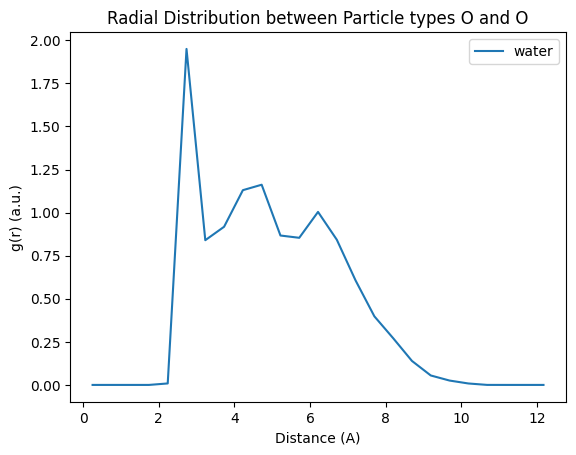

Num atoms a: 64
Num atoms b: 64
<Atom 1: O of type O resid 1 and segid SYSTEM>


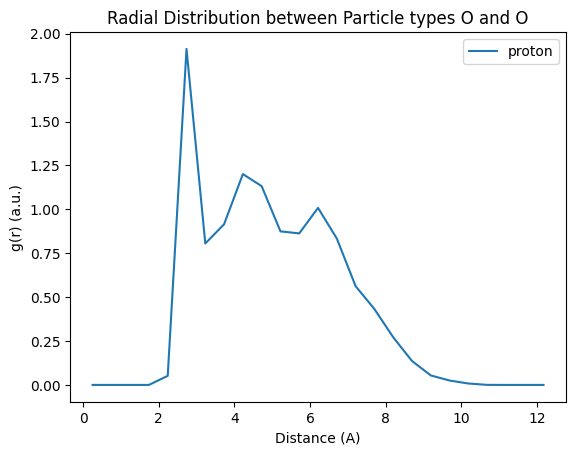

In [7]:
plot_rdfs("water", "O", "O")
plot_rdfs("proton", "O", "O")

In [10]:
def plot_rdf_both(a = "O", b = "O"):
    bins, rdf = compute_rdf("water", a, b)
    plt.plot(bins, rdf, label="water")
    bins, rdf = compute_rdf("proton", a, b)
    plt.plot(bins, rdf, label="proton")
    
    plt.xlabel("Distance (A)")
    plt.ylabel("g(r) (a.u.)")
    plt.title("Radial Distribution between Particle types {} and {}".format(a, b))
    plt.legend()
    plt.savefig("./Figures/rdf_{}_{}_{}.png".format("both", a, b))
    plt.show()

Num atoms a: 64
Num atoms b: 64
<Atom 1: O of type O resid 1 and segid SYSTEM>
Num atoms a: 64
Num atoms b: 64
<Atom 1: O of type O resid 1 and segid SYSTEM>


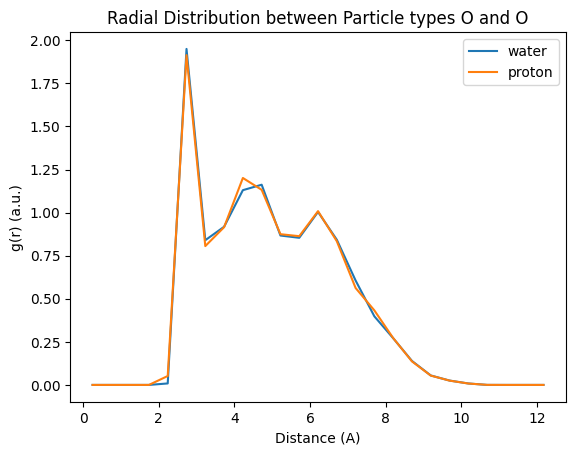

In [12]:
plot_rdf_both("O", "O")